In [1]:
from keras import applications
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [7]:
batch_size = 64
img_height, img_width = 224, 224

dir = "/content/drive/My Drive/DD2424 Project/Dataset/NEW/SORTED_IN_GRAYSCALE/"

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=[0.8, 0.85],
    horizontal_flip=True,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 278 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


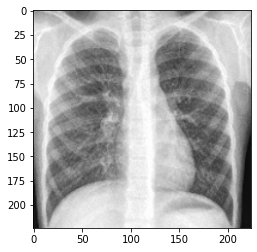

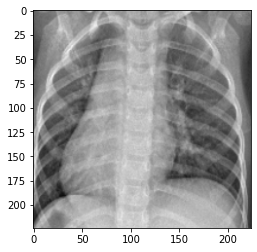

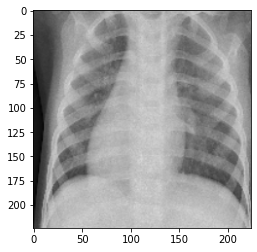

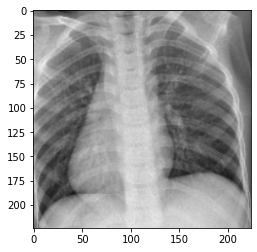

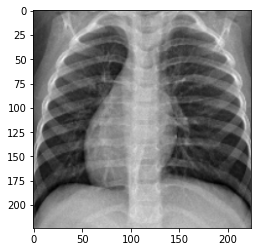

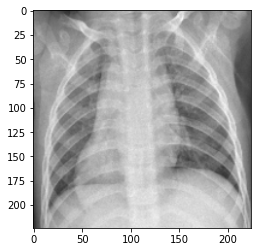

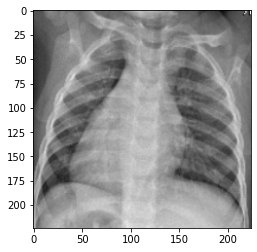

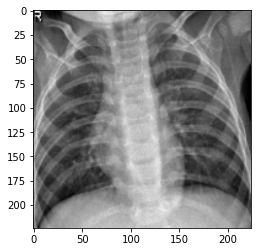

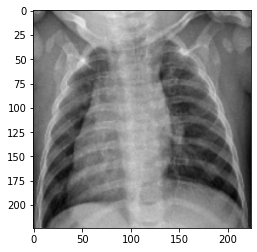

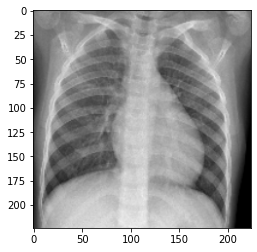

In [8]:
x_batch, y_batch = next(train_generator)
for i in range (0,10):
    image = x_batch[i]
    #print(image.shape)
    plt.figure()
    plt.imshow(x_batch[i])
    print(y_batch[i])

58892288/58889256 [==============================] - 3s 0us/step
Epoch 1/50
4/4 [==============================] - 52s 13s/step - loss: 1.4961 - accuracy: 0.5280 - val_loss: 0.5506 - val_accuracy: 0.7656
Epoch 2/50
4/4 [==============================] - 31s 8s/step - loss: 0.5300 - accuracy: 0.7617 - val_loss: 0.5154 - val_accuracy: 0.7455
Epoch 3/50
4/4 [==============================] - 6s 1s/step - loss: 0.4888 - accuracy: 0.7791 - val_loss: 0.4774 - val_accuracy: 0.7812
Epoch 4/50
4/4 [==============================] - 10s 2s/step - loss: 0.5201 - accuracy: 0.7617 - val_loss: 0.5322 - val_accuracy: 0.7273
Epoch 5/50
4/4 [==============================] - 10s 3s/step - loss: 0.5081 - accuracy: 0.7336 - val_loss: 0.4385 - val_accuracy: 0.7969
Epoch 6/50
4/4 [==============================] - 8s 2s/step - loss: 0.4543 - accuracy: 0.7570 - val_loss: 0.4658 - val_accuracy: 0.7091
Epoch 7/50
4/4 [==============================] - 10s 3s/step - loss: 0.4147 - accuracy: 0.7804 - val_loss: 

Text(0, 0.5, 'loss and accuracy')

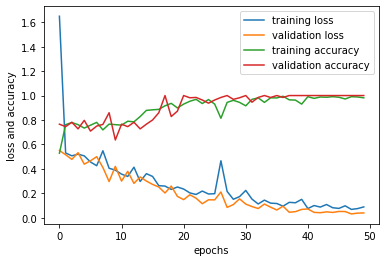

In [9]:
nb_epochs = 50

model_vgg = applications.VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224, 3))) # VGG16 without the fully connected layers
#model_vgg = applications.ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224,224, 3))) # ResNet50 without the fully connected layers

for layer in model_vgg.layers:
  layer.trainable = False # don't train these

model_fc = Sequential()
model_fc.add(Flatten(input_shape=model_vgg.output_shape[1:])) # Flatten so that they fit
model_fc.add(Dense(128, activation='relu')) # new fc layer
model_fc.add(Dropout(0.25))
model_fc.add(Dense(1, activation='sigmoid')) # prediction layer

model = Model(inputs=model_vgg.input, outputs=model_fc(model_vgg.output)) # merges them

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy']) # I chose SGD becaues it's seemed to be the most easy to understand optimizer

history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss and accuracy')

In [0]:
model.save_weights(filepath='/content/drive/My Drive/DD2424 Project/Results/unsorted_in_grayscale.txt')